In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
import pprint
import spectral
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN

In [15]:
def plotClustering(X, plt_labels, features=(0,1), ax=plt):
    if features[0] == features[1]:
        ax.hist(
            X[:, features[0]],
            edgecolor='black'
        )
    else:
        ax.scatter(
            X[:,features[0]],
            X[:,features[1]],
            c=plt_labels,
            edgecolor='black'
        )
def show_results(model, table_size=3):
    Y = model.labels_.reshape(data.shape[0], data.shape[1]).astype(np.uint8)
    fig, axes = plt.subplots(table_size,table_size)
    fig.set_size_inches(table_size*10,table_size*10)
    for i in np.unique(model.labels_):
        pic = np.zeros(Y.shape, dtype=np.uint8)
        pic[Y == i] = 1
        axes[i // table_size][i%table_size].imshow((pic), cmap='summer')
    plt.figure(figsize=(15,15))
    plt.imshow(Y, cmap='tab10')
    
from clustering_indexex import (davies_bouldin_index, dunn_index)

def positive_labels(labels):
    if np.any(labels < 0):
        return labels + np.abs(np.min(labels))
    return labels
    

In [10]:
import spectral
img = spectral.open_image(
    '/pio/scratch/2/ED2015/APEX/APEX_OSD_Package_1.0/APEX_OSD_Package_1.0/APEX_OSD_V1_calibr_cube.hdr'
)
data = img.load()
X = data.reshape(-1, data.shape[-1])
X_std = (X - X.mean(0)) / X.std(0)

/pio/os/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """


5


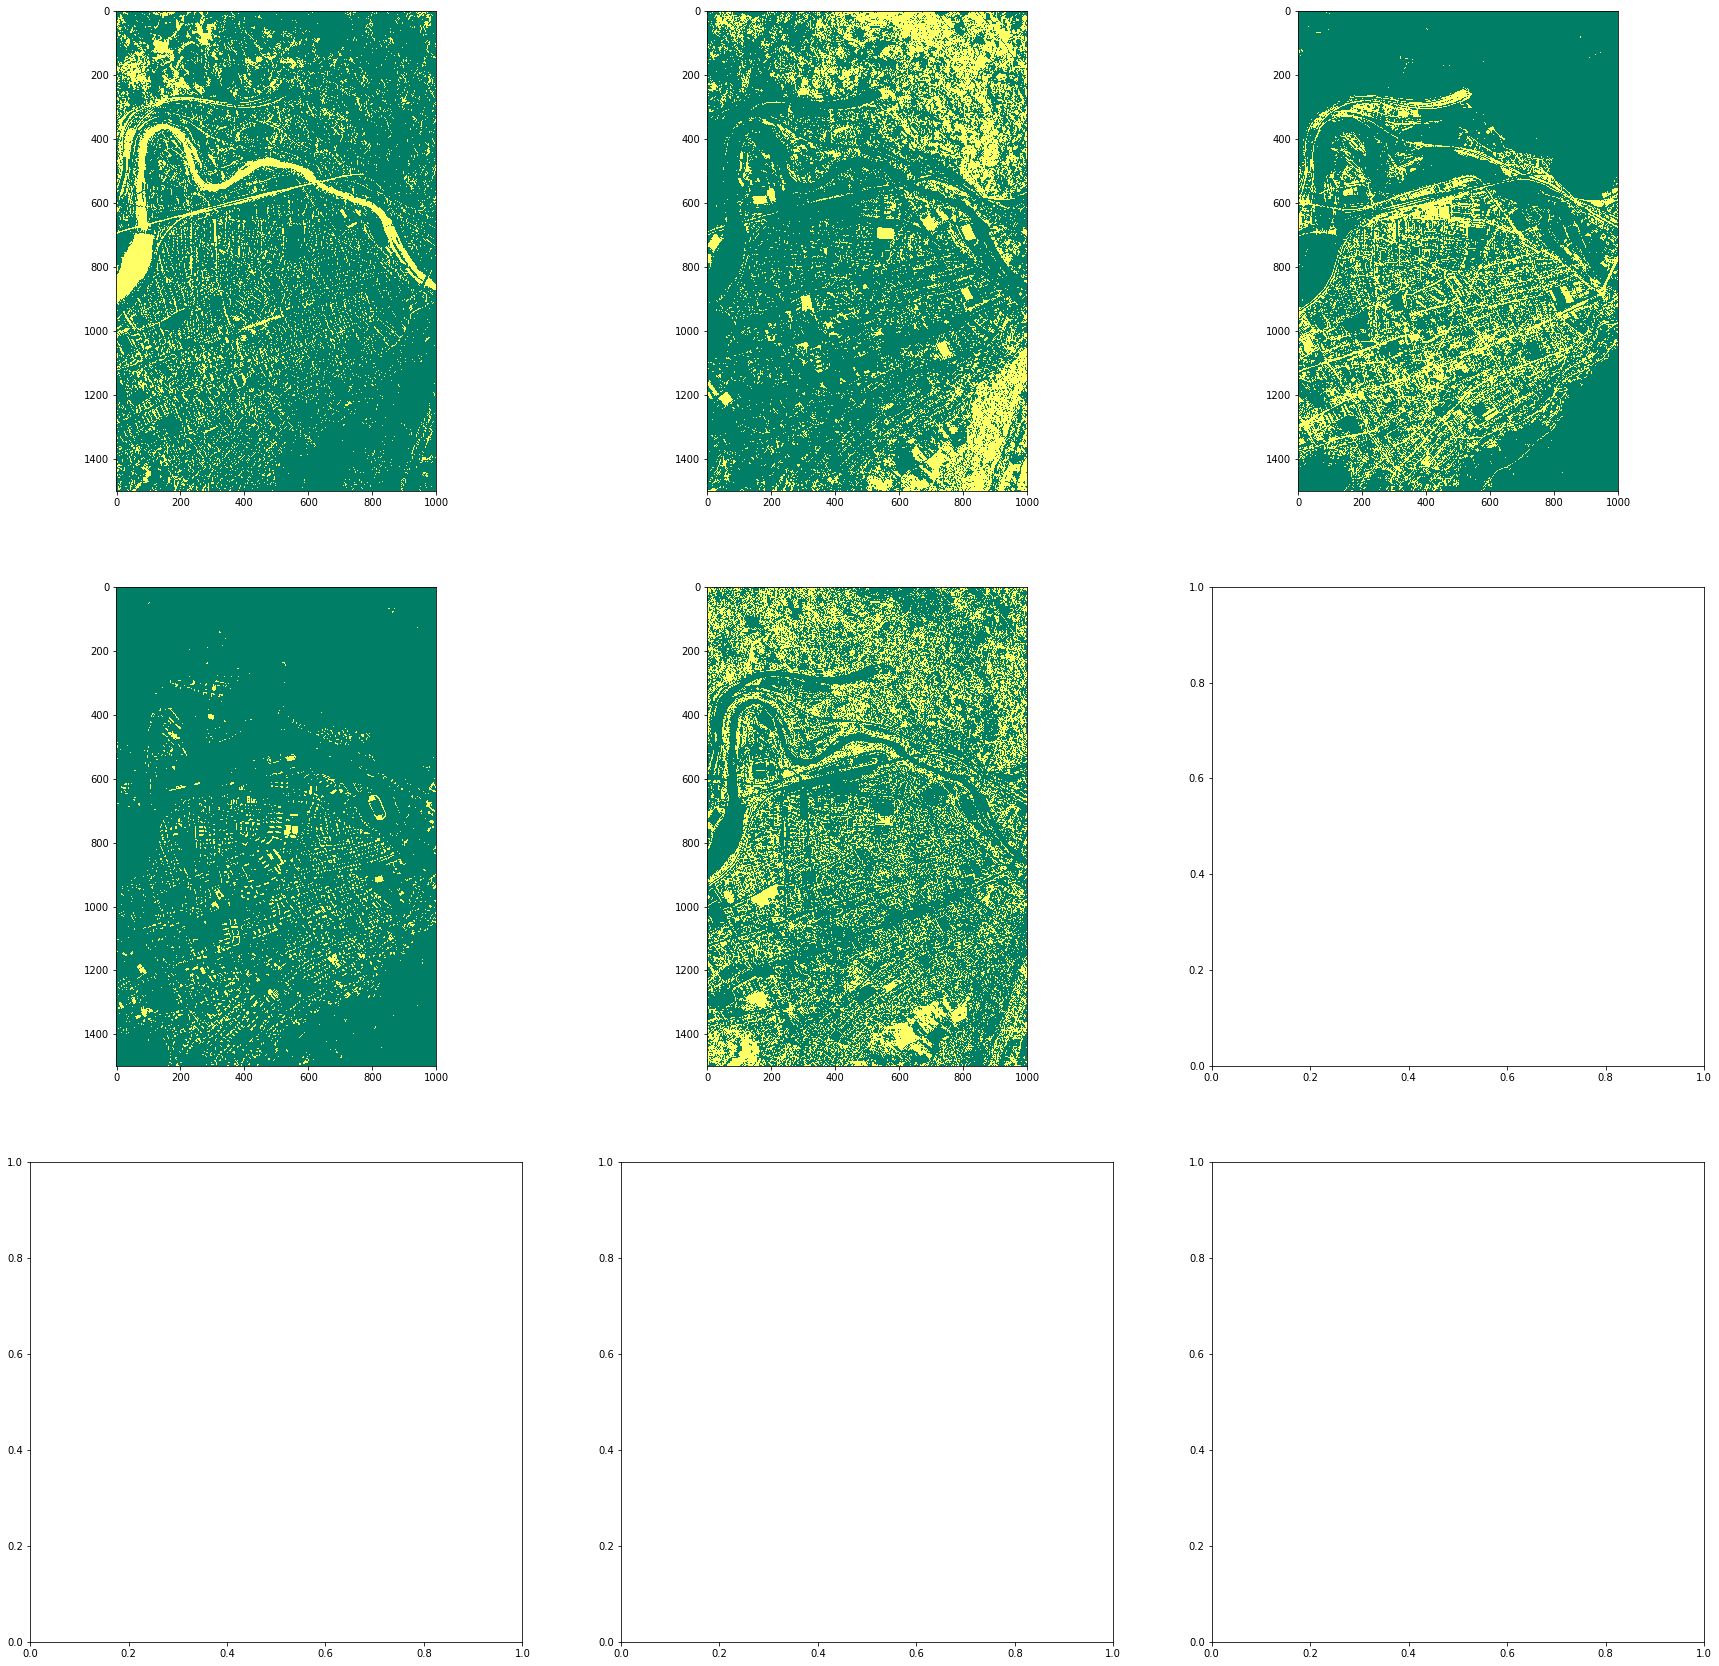

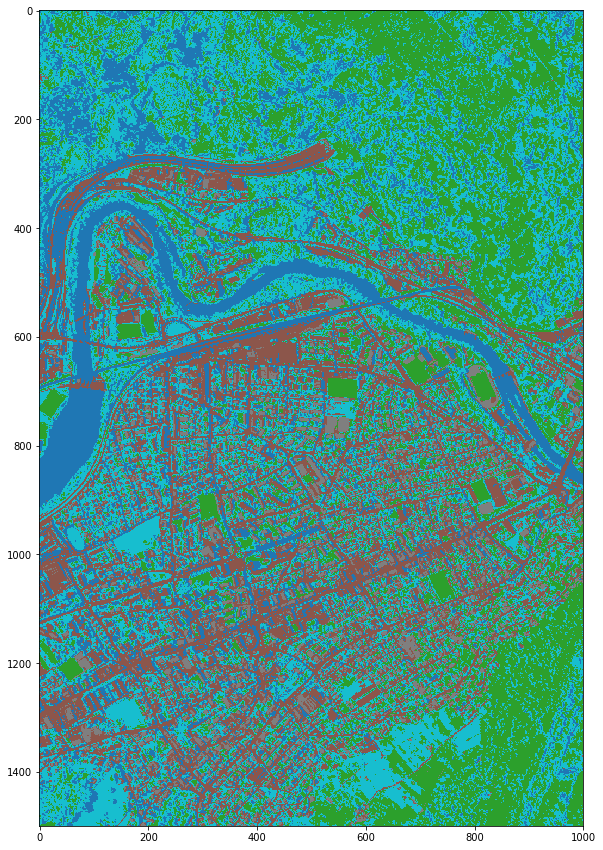

In [23]:
params = dict(n_clusters=5, n_init=15)
model = MiniBatchKMeans(**params)
# model = DBSCAN(eps=0.1)
model.fit(X)
print(np.unique(model.labels_).size)
show_results(model, table_size=3)

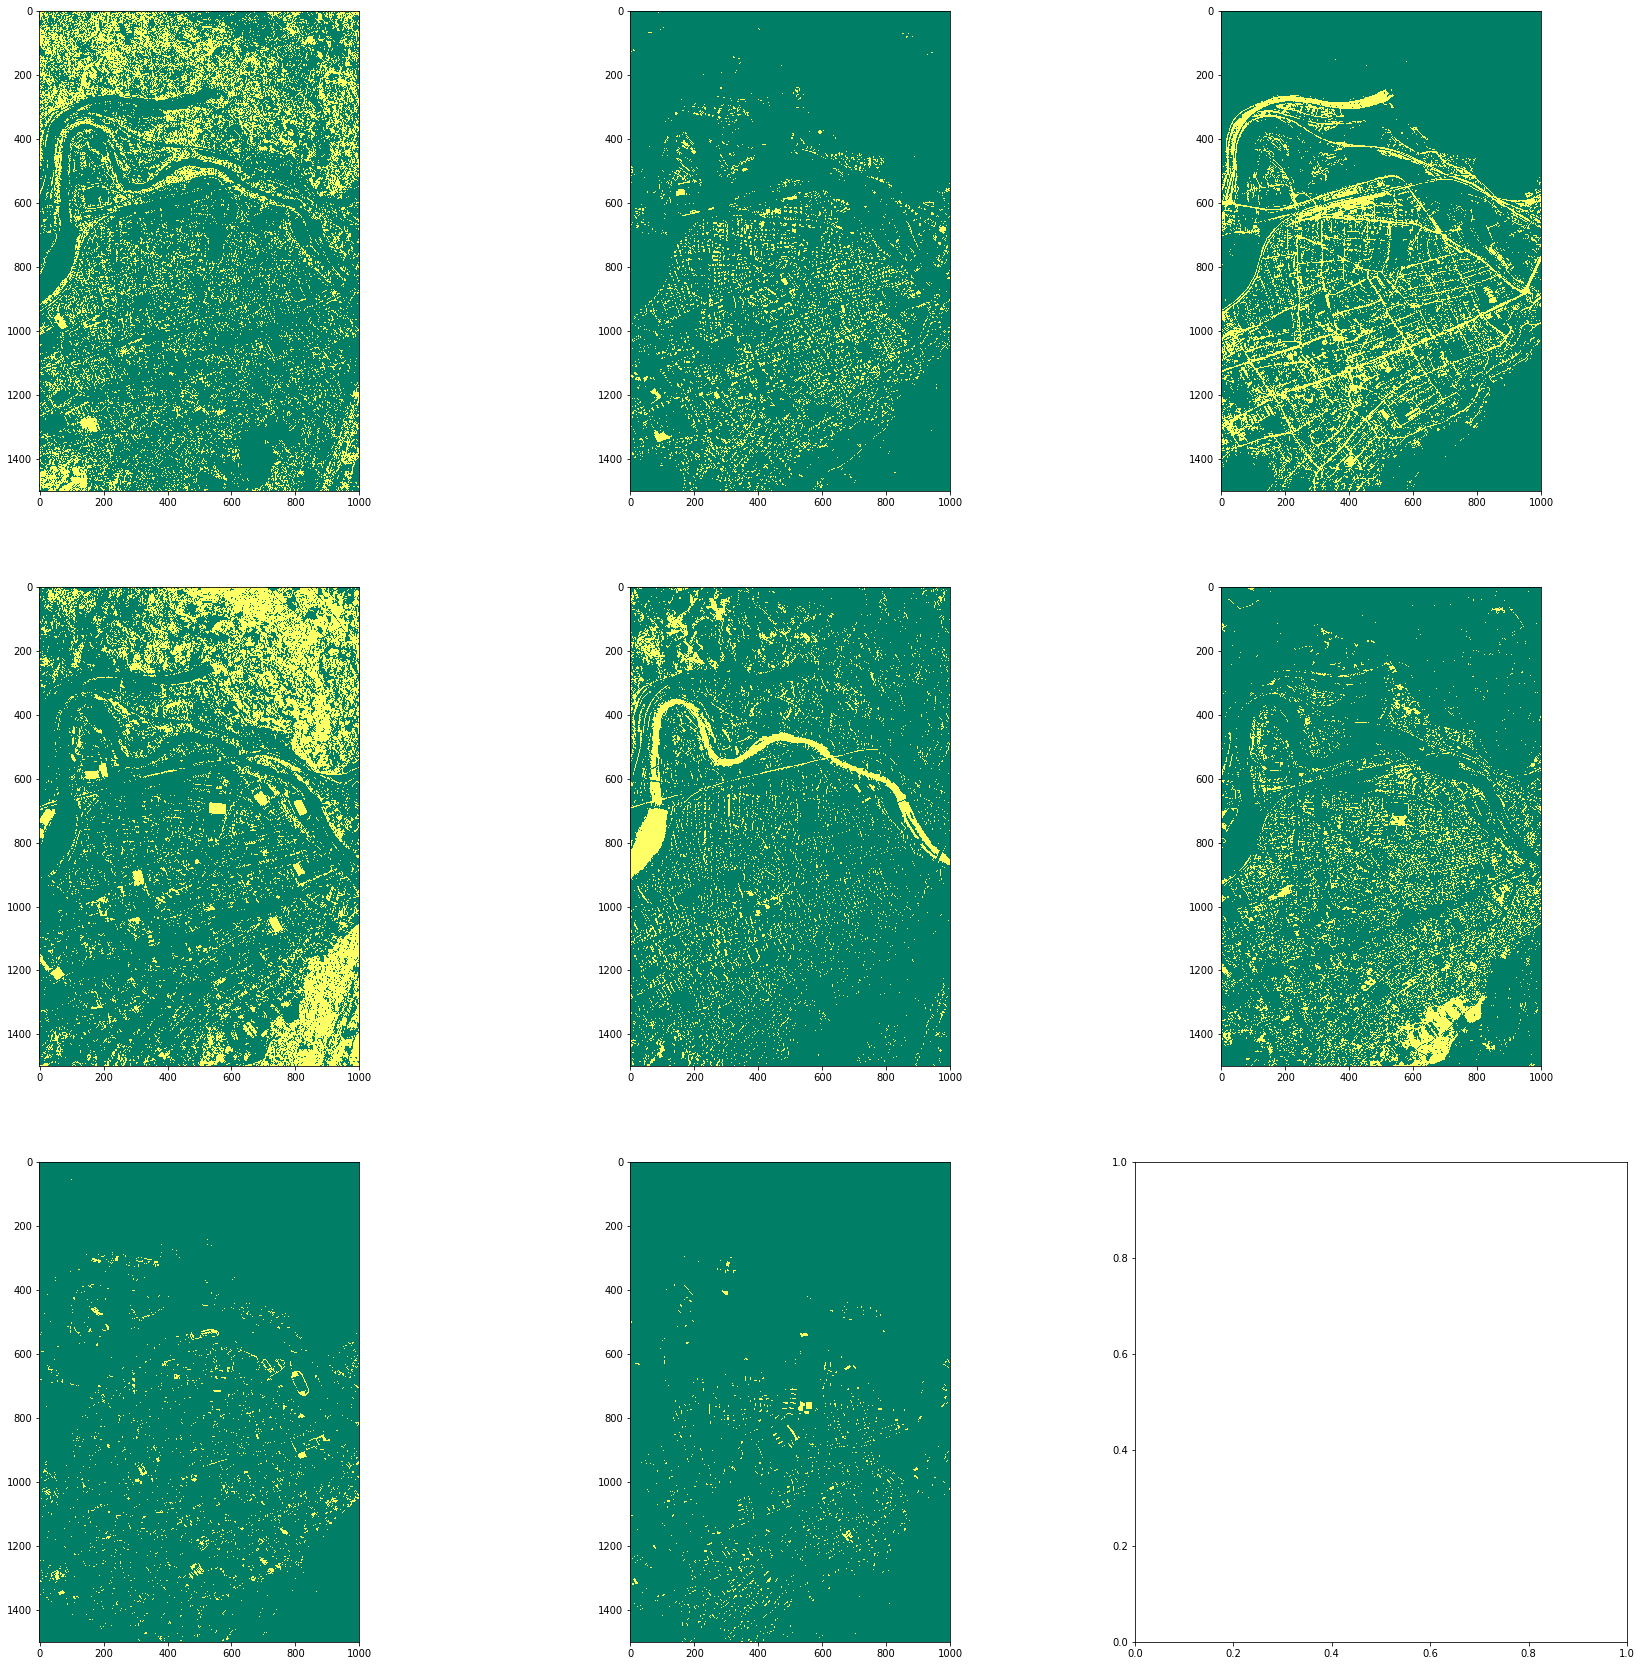

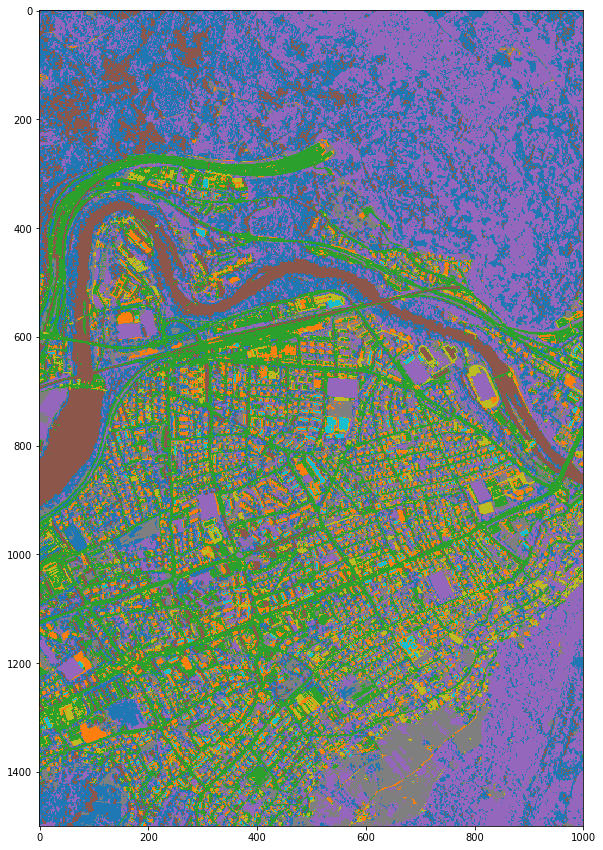

In [12]:
model = MiniBatchKMeans(n_clusters=8, n_init=15, batch_size=400)
# model = DBSCAN(eps=0.1)
model.fit(X_std)
show_results(model)

In [ ]:
# model = Birch()
# # model = DBSCAN(eps=0.1)
# model.fit(X_std)
# show_results(model)